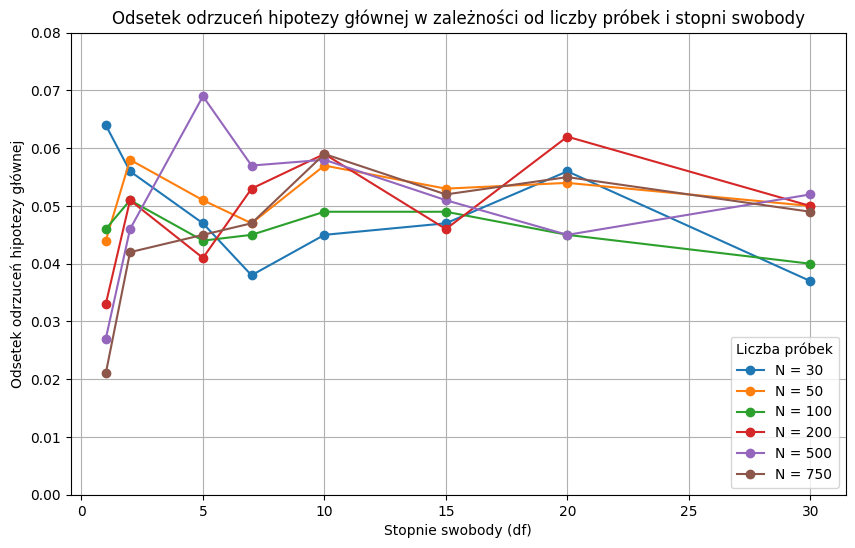

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, pearsonr
from tqdm import tqdm

# Funkcja do przeprowadzania testu istotności korelacji
def correlation_test(n, df):
    # Generowanie danych z rozkładu t-Studenta
    X = t.rvs(df, size=n)
    Y = t.rvs(df, size=n)
    
    # Obliczanie współczynnika korelacji Pearsona i testowanie jego istotności
    corr, p_value = pearsonr(X, Y)
    
    # Hipoteza główna to brak korelacji, więc testujemy p-value < 0.05
    return p_value < 0.05

# Funkcja do obliczania odsetka odrzuceń hipotezy głównej
def rejection_rate(n, df, num_simulations=1000):
    reject_count = 0
    for _ in range(num_simulations):
        if correlation_test(n, df):
            reject_count += 1
    return reject_count / num_simulations

# Parametry
sample_sizes = [30, 50, 100, 200, 500, 750]  # Liczba próbek
df_values = [1, 2, 5, 7, 10, 15, 20, 30]  # Stopnie swobody rozkładu t-Studenta
num_simulations = 1000  # Liczba symulacji

# Przygotowanie do analizy
results = np.zeros((len(sample_sizes), len(df_values)))

# Przeprowadzanie symulacji
for i, n in enumerate(sample_sizes):
    for j, df_value in enumerate(df_values):
        results[i, j] = rejection_rate(n, df_value, num_simulations)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Tworzenie wykresów
for i, n in enumerate(sample_sizes):
    plt.plot(df_values, results[i], label=f'N = {n}', marker='o')

# Konfiguracja wykresu
plt.title('Odsetek odrzuceń hipotezy głównej w zależności od liczby próbek i stopni swobody')
plt.xlabel('Stopnie swobody (df)')
plt.ylabel('Odsetek odrzuceń hipotezy głównej')
plt.legend(title='Liczba próbek')
plt.grid(True)
plt.ylim(0, 0.08)
plt.show()

# Wnioski:
# Wykres pokazuje, że większa liczba próbek prowadzi do bardziej stabilnych wyników testu.
# Przy małych próbach odsetek odrzuceń hipotezy głównej jest bardziej zmienny, szczególnie przy niskich stopniach swobody.
# Zwiększenie stopni swobody zmniejsza odsetek odrzuceń, co wskazuje na zbliżanie się rozkładu t-Studenta do normalnego rozkładu przy wyższych stopniach swobody.
# Dla większych prób odsetek odrzuceń jest stabilniejszy, a zmienność wyników jest mniejsza, co sugeruje, że większa liczba próbek pozwala na bardziej wiarygodne wyniki testu.

# Zwiększenie liczby próbek i stopni swobody poprawia dokładność testu istotności korelacji w przypadku danych o grubych ogonach.


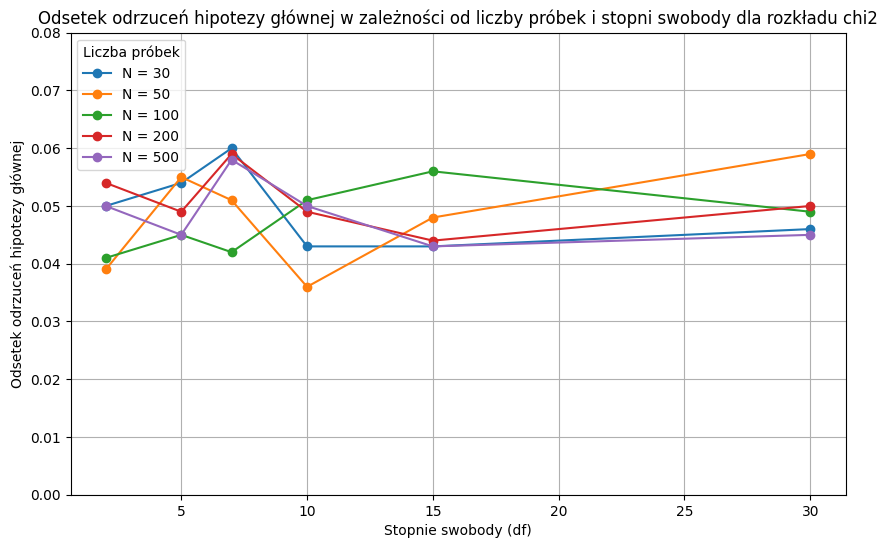

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, pearsonr
from tqdm import tqdm

# Funkcja do przeprowadzania testu istotności korelacji
def correlation_test_chi2(n, df):
    # Generowanie danych z rozkładu chi-kwadrat i jego przeciwności
    X = chi2.rvs(df, size=n)
    Y = -1 * chi2.rvs(df, size=n)
    
    # Obliczanie współczynnika korelacji Pearsona i testowanie jego istotności
    corr, p_value = pearsonr(X, Y)
    
    # Hipoteza główna to brak korelacji, więc testujemy p-value < 0.05
    return p_value < 0.05

# Funkcja do obliczania odsetka odrzuceń hipotezy głównej
def rejection_rate_chi2(n, df, num_simulations=1000):
    reject_count = 0
    for _ in range(num_simulations):
        if correlation_test_chi2(n, df):
            reject_count += 1
    return reject_count / num_simulations

# Parametry
sample_sizes = [30, 50, 100, 200, 500]  # Liczba próbek
df_values = [2, 5, 7, 10, 15, 30]  # Stopnie swobody rozkładu chi-kwadrat
num_simulations = 1000  # Liczba symulacji

# Przygotowanie do analizy
results = np.zeros((len(sample_sizes), len(df_values)))

# Przeprowadzanie symulacji
for i, n in enumerate(sample_sizes):
    for j, df_value in enumerate(df_values):
        results[i, j] = rejection_rate_chi2(n, df_value, num_simulations)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))

# Tworzenie wykresów
for i, n in enumerate(sample_sizes):
    plt.plot(df_values, results[i], label=f'N = {n}', marker='o')

# Konfiguracja wykresu
plt.title('Odsetek odrzuceń hipotezy głównej w zależności od liczby próbek i stopni swobody dla rozkładu chi2')
plt.xlabel('Stopnie swobody (df)')
plt.ylabel('Odsetek odrzuceń hipotezy głównej')
plt.legend(title='Liczba próbek')
plt.grid(True)
plt.ylim(0, 0.08)
plt.show()

# Wnioski:
# Wykres pokazuje, że większa liczba próbek prowadzi do bardziej stabilnych wyników testu.
# Dla małych próbek odsetek odrzuceń hipotezy głównej jest bardziej zmienny, zwłaszcza przy niskich stopniach swobody.
# Wraz ze wzrostem liczby próbek wyniki stają się bardziej stabilne, a zmienność odsetka odrzuceń maleje.
# Stopnie swobody mają mniejszy wpływ na wyniki przy dużych próbach, a odsetek odrzuceń hipotezy głównej stabilizuje się.

# Zwiększenie liczby próbek poprawia stabilność wyników, a większe próby są mniej podatne na zmienność wyników przy różnych stopniach swobody.



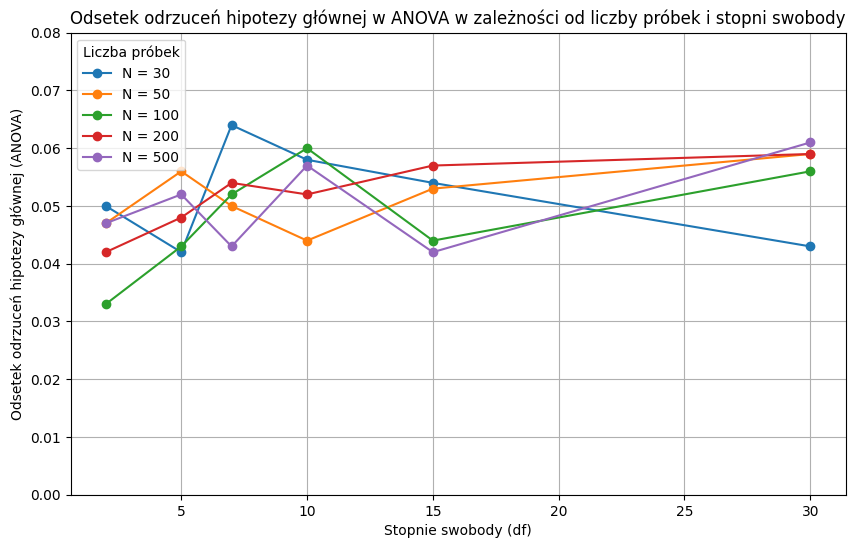

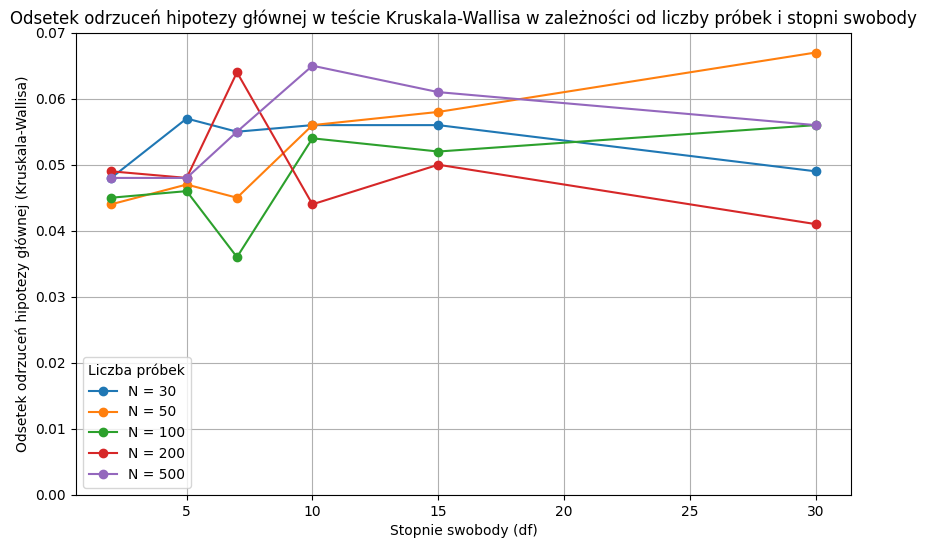

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, f, kruskal
from scipy import stats

# Funkcja do przeprowadzania testu ANOVA
def anova_test(n, df):
    # Generowanie trzech grup danych z rozkładu t-Studenta
    group1 = t.rvs(df, size=n)
    group2 = t.rvs(df, size=n)
    group3 = t.rvs(df, size=n)
    
    # Przeprowadzanie testu ANOVA
    _, p_value = stats.f_oneway(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do przeprowadzania testu Kruskala-Wallisa
def kruskal_test(n, df):
    # Generowanie trzech grup danych z rozkładu t-Studenta
    group1 = t.rvs(df, size=n)
    group2 = t.rvs(df, size=n)
    group3 = t.rvs(df, size=n)
    
    # Przeprowadzanie testu Kruskala-Wallisa
    _, p_value = kruskal(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do obliczania odsetka odrzuceń hipotezy głównej
def rejection_rate(test_func, n, df, num_simulations=1000):
    reject_count = 0
    for _ in range(num_simulations):
        if test_func(n, df):
            reject_count += 1
    return reject_count / num_simulations

# Parametry
sample_sizes = [30, 50, 100, 200, 500]  # Liczba próbek
df_values = [2, 5, 7, 10, 15, 30]  # Stopnie swobody rozkładu t-Studenta
num_simulations = 1000  # Liczba symulacji

# Przygotowanie do analizy
results_anova = np.zeros((len(sample_sizes), len(df_values)))
results_kruskal = np.zeros((len(sample_sizes), len(df_values)))

# Przeprowadzanie symulacji dla testu ANOVA i Kruskala-Wallisa
for i, n in enumerate(sample_sizes):
    for j, df_value in enumerate(df_values):
        results_anova[i, j] = rejection_rate(anova_test, n, df_value, num_simulations)
        results_kruskal[i, j] = rejection_rate(kruskal_test, n, df_value, num_simulations)

# Wizualizacja wyników dla testu ANOVA
plt.figure(figsize=(10, 6))

for i, n in enumerate(sample_sizes):
    plt.plot(df_values, results_anova[i], label=f'N = {n}', marker='o')

plt.title('Odsetek odrzuceń hipotezy głównej w ANOVA w zależności od liczby próbek i stopni swobody')
plt.xlabel('Stopnie swobody (df)')
plt.ylabel('Odsetek odrzuceń hipotezy głównej (ANOVA)')
plt.legend(title='Liczba próbek')
plt.grid(True)
plt.ylim(0, 0.08)
plt.show()

# Wizualizacja wyników dla testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))

for i, n in enumerate(sample_sizes):
    plt.plot(df_values, results_kruskal[i], label=f'N = {n}', marker='o')

plt.title('Odsetek odrzuceń hipotezy głównej w teście Kruskala-Wallisa w zależności od liczby próbek i stopni swobody')
plt.xlabel('Stopnie swobody (df)')
plt.ylabel('Odsetek odrzuceń hipotezy głównej (Kruskala-Wallisa)')
plt.legend(title='Liczba próbek')
plt.grid(True)
plt.ylim(0, 0.07)
plt.show()

# Wnioski:
# Dla testu ANOVA:
#   W miarę wzrostu liczby próbek, odsetek odrzuceń hipotezy głównej stabilizuje się.
#   Mniejsze próby charakteryzują się większą zmiennością wyników, zwłaszcza przy małych stopniach swobody.
#   Przy większych liczbach próbek, odsetek odrzuceń jest bardziej stabilny, a zmienność maleje.
#   Dla większych stopni swobody, wyniki stają się bardziej stabilne, z mniejszym odsetkiem fałszywego odrzucenia hipotezy.

# Dla testu Kruskala-Wallisa:
#   Podobnie jak w przypadku ANOVA, większa liczba próbek prowadzi do bardziej stabilnych wyników.
#   Dla mniejszych próbek, odsetek odrzuceń jest bardziej zmienny, szczególnie przy niskich stopniach swobody.
#   Test Kruskala-Wallisa ma większą zmienność przy niższych próbach i stopniach swobody, ale w miarę wzrostu liczby próbek wyniki stają się bardziej stabilne.
#   Dla wyższych stopni swobody, wyniki testu są bardziej jednorodne, a odsetek odrzuceń hipotezy głównej maleje.

# Ogólne wnioski:
#   Zwiększenie liczby próbek w obu testach ANOVA i Kruskala-Wallisa poprawia stabilność wyników i zmniejsza zmienność.
#   Wysokie stopnie swobody zmniejszają odsetek odrzuceń hipotezy głównej, ponieważ rozkłady t-Studenta stają się bardziej zbliżone do rozkładów normalnych.
#   Dla mniejszych prób i niższych stopni swobody, odsetek odrzuceń hipotezy głównej jest większy, co może prowadzić do błędów I rodzaju.



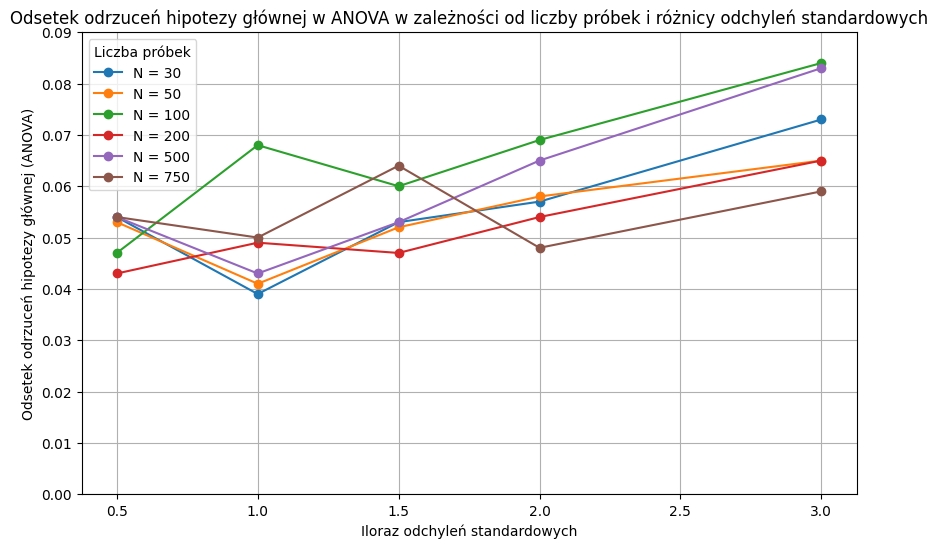

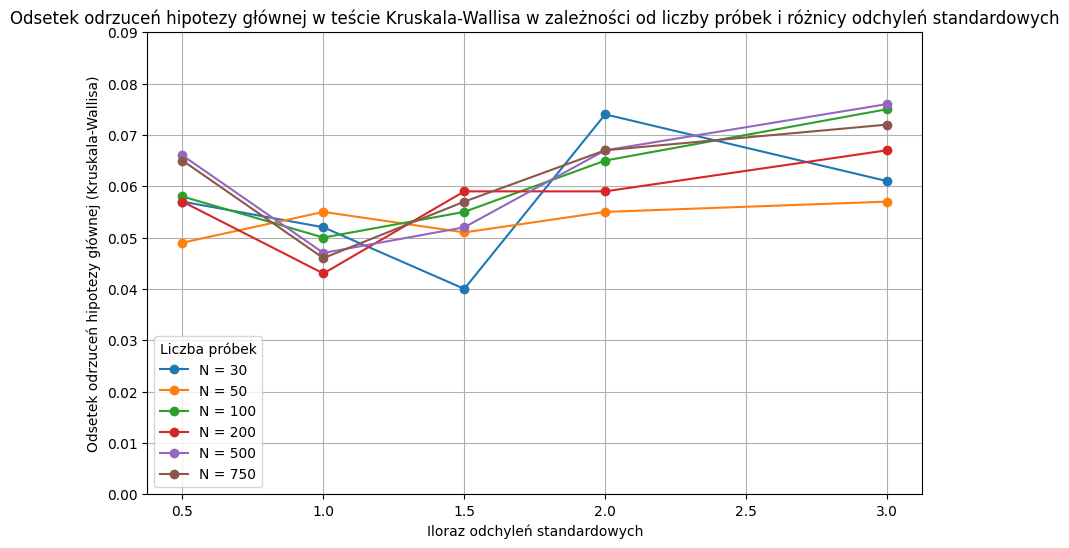

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, kruskal
from scipy import stats

# Funkcja do przeprowadzania testu ANOVA
def anova_test(n, std_ratio):
    # Generowanie trzech grup danych z rozkładu normalnego
    group1 = np.random.normal(0, 1, size=n)  # Pierwsza grupa o odchyleniu 1
    group2 = np.random.normal(0, 1, size=n)  # Druga grupa o odchyleniu 1
    group3 = np.random.normal(0, std_ratio, size=n)  # Trzecia grupa o innym odchyleniu

    # Przeprowadzanie testu ANOVA
    _, p_value = stats.f_oneway(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do przeprowadzania testu Kruskala-Wallisa
def kruskal_test(n, std_ratio):
    # Generowanie trzech grup danych z rozkładu normalnego
    group1 = np.random.normal(0, 1, size=n)  # Pierwsza grupa o odchyleniu 1
    group2 = np.random.normal(0, 1, size=n)  # Druga grupa o odchyleniu 1
    group3 = np.random.normal(0, std_ratio, size=n)  # Trzecia grupa o innym odchyleniu

    # Przeprowadzanie testu Kruskala-Wallisa
    _, p_value = kruskal(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do obliczania odsetka odrzuceń hipotezy głównej
def rejection_rate(test_func, n, std_ratio, num_simulations=1000):
    reject_count = 0
    for _ in range(num_simulations):
        if test_func(n, std_ratio):
            reject_count += 1
    return reject_count / num_simulations

# Parametry
sample_sizes = [30, 50, 100, 200, 500, 750]  # Liczba próbek
std_ratios = [0.5, 1, 1.5, 2, 3]  # Różnica odchyleń standardowych (iloraz)
num_simulations = 1000  # Liczba symulacji

# Przygotowanie do analizy
results_anova = np.zeros((len(sample_sizes), len(std_ratios)))
results_kruskal = np.zeros((len(sample_sizes), len(std_ratios)))

# Przeprowadzanie symulacji dla testu ANOVA i Kruskala-Wallisa
for i, n in enumerate(sample_sizes):
    for j, std_ratio in enumerate(std_ratios):
        results_anova[i, j] = rejection_rate(anova_test, n, std_ratio, num_simulations)
        results_kruskal[i, j] = rejection_rate(kruskal_test, n, std_ratio, num_simulations)

# Wizualizacja wyników dla testu ANOVA
plt.figure(figsize=(10, 6))

for i, n in enumerate(sample_sizes):
    plt.plot(std_ratios, results_anova[i], label=f'N = {n}', marker='o')

plt.title('Odsetek odrzuceń hipotezy głównej w ANOVA w zależności od liczby próbek i różnicy odchyleń standardowych')
plt.xlabel('Iloraz odchyleń standardowych')
plt.ylabel('Odsetek odrzuceń hipotezy głównej (ANOVA)')
plt.legend(title='Liczba próbek')
plt.grid(True)
plt.ylim(0, 0.09)
plt.show()

# Wizualizacja wyników dla testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))

for i, n in enumerate(sample_sizes):
    plt.plot(std_ratios, results_kruskal[i], label=f'N = {n}', marker='o')

plt.title('Odsetek odrzuceń hipotezy głównej w teście Kruskala-Wallisa w zależności od liczby próbek i różnicy odchyleń standardowych')
plt.xlabel('Iloraz odchyleń standardowych')
plt.ylabel('Odsetek odrzuceń hipotezy głównej (Kruskala-Wallisa)')
plt.legend(title='Liczba próbek')
plt.grid(True)
plt.ylim(0, 0.09)
plt.show()

# Wnioski:
# Dla testu ANOVA:
#   W miarę jak iloraz odchyleń standardowych rośnie, odsetek odrzuceń hipotezy głównej wzrasta.
#   Zwiększenie liczby próbek powoduje stabilizację wyników, zmniejszając zmienność odsetka odrzuceń.
#   Dla mniejszych prób oraz wyższych ilorazów odchyleń standardowych, odsetek odrzuceń rośnie, co może wskazywać na problem z założeniami o równości wariancji w ANOVA.
#   Test ANOVA staje się bardziej czuły przy wyższych różnicach w odchyleniach standardowych, ale z większą liczbą próbek efektywność testu jest bardziej stabilna.

# Dla testu Kruskala-Wallisa:
#   Test Kruskala-Wallisa jest mniej wrażliwy na różnice w wariancjach, jednak również wykazuje wyższy odsetek odrzuceń hipotezy głównej przy wyższych ilorazach odchyleń standardowych.
#   Przy większej liczbie próbek, niezależnie od różnicy w wariancjach, test Kruskala-Wallisa staje się bardziej stabilny.
#   Kruskal-Wallis wykazuje stabilniejszą odpowiedź w stosunku do ANOVA, zwłaszcza przy mniejszych próbach i większych różnicach w wariancjach.
#   Wykres wskazuje, że test Kruskala-Wallisa może być bardziej odporny na niejednakowe wariancje, co sprawia, że jest dobrym wyborem przy różnych wariancjach między grupami.

# Ogólne wnioski:
#   Większa liczba próbek poprawia stabilność wyników w obu testach.
#   Test Kruskala-Wallisa jest mniej wrażliwy na różnice w wariancjach (szczególnie przy mniejszych próbach).
#   Test ANOVA wykazuje większą zmienność w wyniku testu, gdy różnice w wariancjach między grupami są większe, co może prowadzić do błędów typu I, zwłaszcza przy mniejszych próbach.
#   Zwiększenie liczby próbek oraz stosowanie testu Kruskala-Wallisa może poprawić wyniki w sytuacjach, gdy wariancje grup są nierówne.



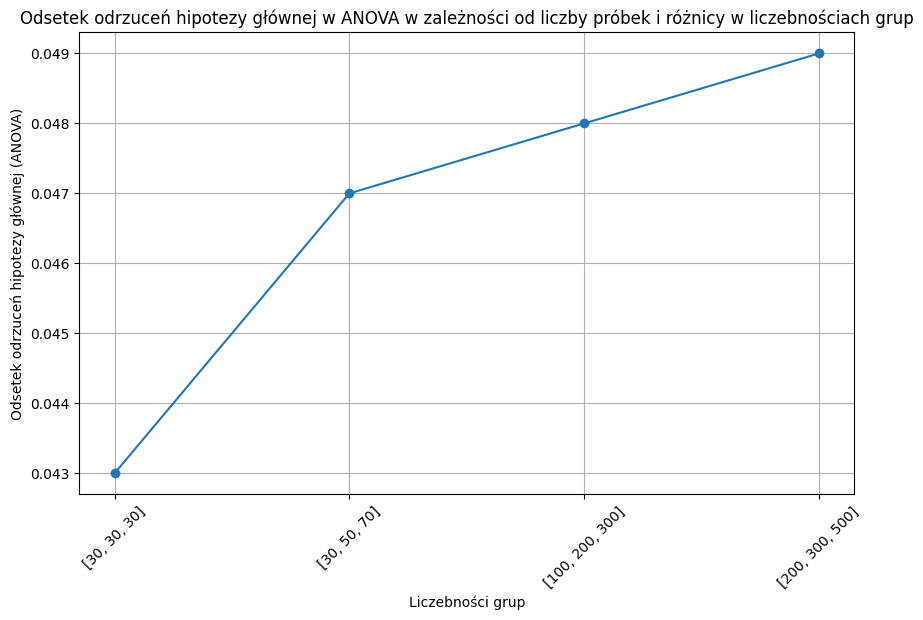

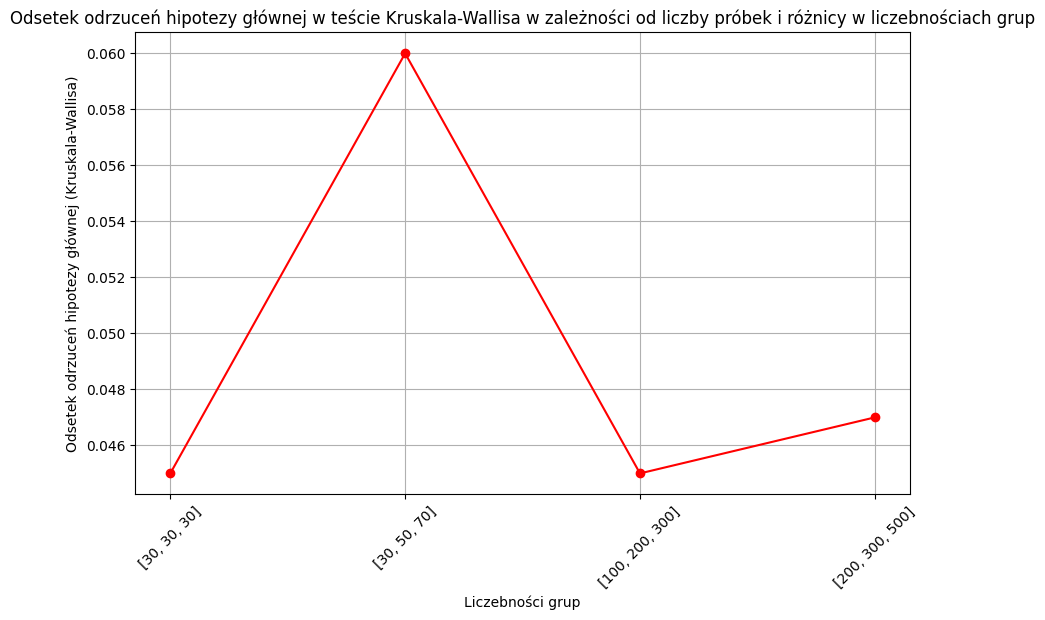

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, kruskal
from scipy import stats

# Funkcja do przeprowadzania testu ANOVA
def anova_test(group_sizes):
    # Generowanie trzech grup danych z rozkładu normalnego, każda o różnych liczebnościach
    group1 = np.random.normal(0, 1, size=group_sizes[0])  # Pierwsza grupa
    group2 = np.random.normal(0, 1, size=group_sizes[1])  # Druga grupa
    group3 = np.random.normal(0, 1, size=group_sizes[2])  # Trzecia grupa

    # Przeprowadzanie testu ANOVA
    _, p_value = stats.f_oneway(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do przeprowadzania testu Kruskala-Wallisa
def kruskal_test(group_sizes):
    # Generowanie trzech grup danych z rozkładu normalnego, każda o różnych liczebnościach
    group1 = np.random.normal(0, 1, size=group_sizes[0])  # Pierwsza grupa
    group2 = np.random.normal(0, 1, size=group_sizes[1])  # Druga grupa
    group3 = np.random.normal(0, 1, size=group_sizes[2])  # Trzecia grupa

    # Przeprowadzanie testu Kruskala-Wallisa
    _, p_value = kruskal(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do obliczania odsetka odrzuceń hipotezy głównej
def rejection_rate(test_func, group_sizes, num_simulations=1000):
    reject_count = 0
    for _ in range(num_simulations):
        if test_func(group_sizes):
            reject_count += 1
    return reject_count / num_simulations

# Parametry
group_sizes_list = [
    [30, 30, 30],  # Równe liczebności
    [30, 50, 70],  # Różne liczebności
    [100, 200, 300],  # Różne liczebności
    [200, 300, 500]   # Bardzo różne liczebności
]  
num_simulations = 1000  # Liczba symulacji

# Przygotowanie do analizy
results_anova = np.zeros((len(group_sizes_list),))
results_kruskal = np.zeros((len(group_sizes_list),))

# Przeprowadzanie symulacji dla testu ANOVA i Kruskala-Wallisa
for i, group_sizes in enumerate(group_sizes_list):
    results_anova[i] = rejection_rate(anova_test, group_sizes, num_simulations)
    results_kruskal[i] = rejection_rate(kruskal_test, group_sizes, num_simulations)

# Wizualizacja wyników dla testu ANOVA
plt.figure(figsize=(10, 6))

plt.plot([str(group_sizes) for group_sizes in group_sizes_list], results_anova, label='ANOVA', marker='o')

plt.title('Odsetek odrzuceń hipotezy głównej w ANOVA w zależności od liczby próbek i różnicy w liczebnościach grup')
plt.xlabel('Liczebności grup')
plt.ylabel('Odsetek odrzuceń hipotezy głównej (ANOVA)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Wizualizacja wyników dla testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))

plt.plot([str(group_sizes) for group_sizes in group_sizes_list], results_kruskal, label='Kruskala-Wallisa', marker='o', color='red')

plt.title('Odsetek odrzuceń hipotezy głównej w teście Kruskala-Wallisa w zależności od liczby próbek i różnicy w liczebnościach grup')
plt.xlabel('Liczebności grup')
plt.ylabel('Odsetek odrzuceń hipotezy głównej (Kruskala-Wallisa)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Wnioski:
# Dla testu ANOVA:
#   Odsetek odrzuceń hipotezy głównej rośnie, gdy różnica w liczebnościach grup staje się większa.
#   Dla najbardziej zróżnicowanych liczebności (np. [200, 300, 500]), odsetek odrzuceń jest wyższy, co może sugerować, że ANOVA jest bardziej wrażliwa na różnice w liczebnościach.
#   Dla równej liczebności grup (np. [30, 30, 30]), odsetek odrzuceń jest niższy, ale stabilny w stosunku do innych konfiguracji grup.
#   Test ANOVA staje się mniej czuły przy zbliżonych liczebnościach, co może wpływać na stabilność wyników.

# Dla testu Kruskala-Wallisa:
#    Kruskal-Wallis jest bardziej wrażliwy na nierówności w liczebnościach grup, co widać w wykresie, gdzie odsetek odrzuceń osiąga szczyt przy różnicy w liczebnościach grup (np. [30, 50, 70]).
#    Wykres pokazuje, że przy bardziej zróżnicowanych liczebnościach (np. [200, 300, 500]) odsetek odrzuceń staje się bardziej stabilny, ale nadal wyższy niż w przypadku równej liczebności.
#    Kruskal-Wallis może wykazywać większą zmienność w wynikach przy nierównych grupach, zwłaszcza w małych próbach, ale stabilizuje się przy większych liczbach próbek.

# Ogólne wnioski:
#    Test ANOVA wykazuje większą stabilność przy równych liczebnościach grup, ale staje się bardziej wrażliwy przy nierównych liczebnościach, co może prowadzić do wyższych odsetków odrzuceń hipotezy głównej.
#    Test Kruskala-Wallisa jest bardziej odporny na nierówności w liczebnościach, ale w przypadku dużych różnic w liczebnościach (np. [100, 200, 300]) jego wyniki są bardziej stabilne.
#    Zwiększenie liczby próbek w grupach zmniejsza zmienność odsetka odrzuceń hipotezy głównej w obu testach.



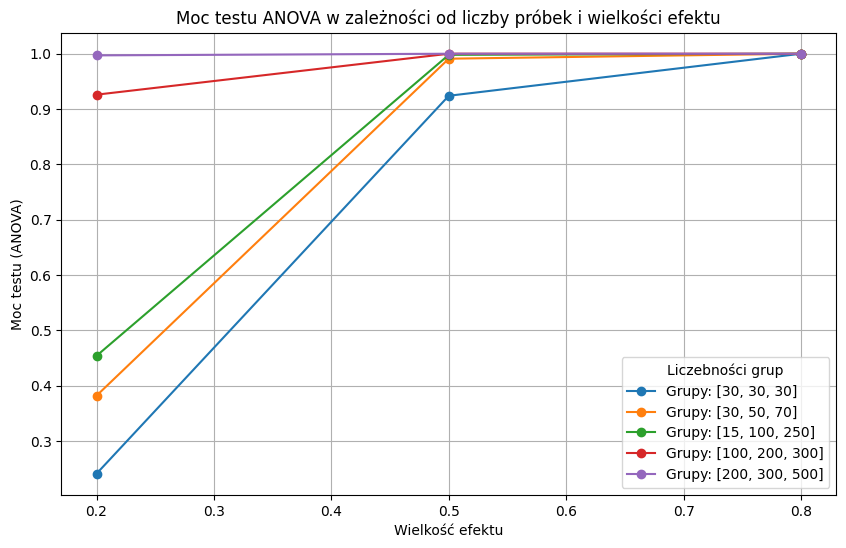

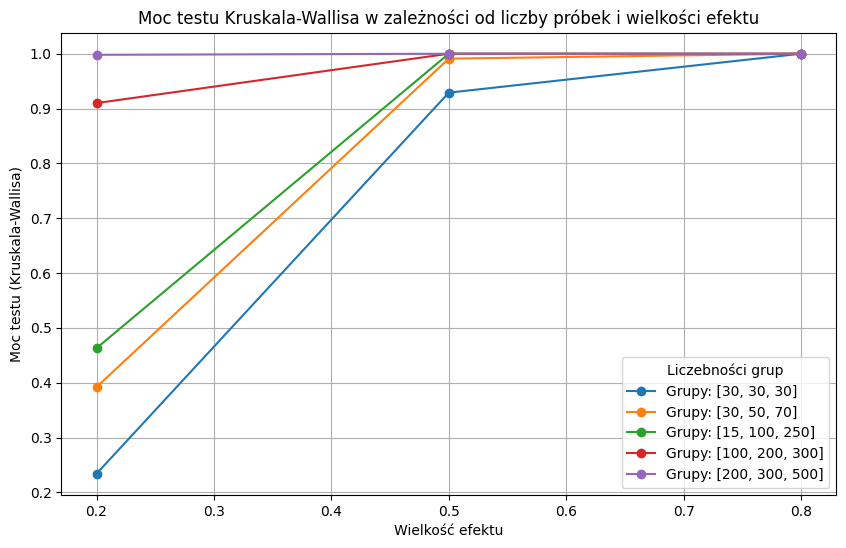

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, kruskal
from scipy import stats

# Funkcja do przeprowadzania testu ANOVA
def anova_test(group_sizes, effect_size=0.5):
    # Generowanie trzech grup danych z rozkładu normalnego
    group1 = np.random.normal(0, 1, size=group_sizes[0])  # Grupa 1
    group2 = np.random.normal(effect_size, 1, size=group_sizes[1])  # Grupa 2 z efektem (fałszywa hipoteza)
    group3 = np.random.normal(2*effect_size, 1, size=group_sizes[2])  # Grupa 3 z większym efektem (fałszywa hipoteza)
    
    # Przeprowadzanie testu ANOVA
    _, p_value = stats.f_oneway(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do przeprowadzania testu Kruskala-Wallisa
def kruskal_test(group_sizes, effect_size=0.5):
    # Generowanie trzech grup danych z rozkładu normalnego
    group1 = np.random.normal(0, 1, size=group_sizes[0])  # Grupa 1
    group2 = np.random.normal(effect_size, 1, size=group_sizes[1])  # Grupa 2 z efektem (fałszywa hipoteza)
    group3 = np.random.normal(2*effect_size, 1, size=group_sizes[2])  # Grupa 3 z większym efektem (fałszywa hipoteza)
    
    # Przeprowadzanie testu Kruskala-Wallisa
    _, p_value = kruskal(group1, group2, group3)
    
    # Hipoteza zerowa: brak różnic między grupami (p-value < 0.05 to odrzucenie hipotezy)
    return p_value < 0.05

# Funkcja do obliczania mocy testu
def power_analysis(test_func, group_sizes, effect_size=0.5, num_simulations=1000):
    reject_count = 0
    for _ in range(num_simulations):
        if test_func(group_sizes, effect_size):
            reject_count += 1
    return reject_count / num_simulations

# Parametry
group_sizes_list = [
    [30, 30, 30],  # Równe liczebności
    [30, 50, 70],  # Różne liczebności
    [15, 100, 250], # Rózne liczności
    [100, 200, 300],  # Duże grupy
    [200, 300, 500]   # Bardzo duże grupy
]
effect_sizes = [0.2, 0.5, 0.8]  # Mały, średni i duży efekt
num_simulations = 1000  # Liczba symulacji

# Przygotowanie do analizy
results_anova = np.zeros((len(group_sizes_list), len(effect_sizes)))
results_kruskal = np.zeros((len(group_sizes_list), len(effect_sizes)))

# Przeprowadzanie symulacji dla testu ANOVA i Kruskala-Wallisa
for i, group_sizes in enumerate(group_sizes_list):
    for j, effect_size in enumerate(effect_sizes):
        results_anova[i, j] = power_analysis(anova_test, group_sizes, effect_size, num_simulations)
        results_kruskal[i, j] = power_analysis(kruskal_test, group_sizes, effect_size, num_simulations)

# Wizualizacja wyników dla testu ANOVA
plt.figure(figsize=(10, 6))

for i, group_sizes in enumerate(group_sizes_list):
    plt.plot(effect_sizes, results_anova[i], label=f'Grupy: {group_sizes}', marker='o')

plt.title('Moc testu ANOVA w zależności od liczby próbek i wielkości efektu')
plt.xlabel('Wielkość efektu')
plt.ylabel('Moc testu (ANOVA)')
plt.legend(title='Liczebności grup')
plt.grid(True)
plt.show()

# Wizualizacja wyników dla testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))

for i, group_sizes in enumerate(group_sizes_list):
    plt.plot(effect_sizes, results_kruskal[i], label=f'Grupy: {group_sizes}', marker='o')

plt.title('Moc testu Kruskala-Wallisa w zależności od liczby próbek i wielkości efektu')
plt.xlabel('Wielkość efektu')
plt.ylabel('Moc testu (Kruskala-Wallisa)')
plt.legend(title='Liczebności grup')
plt.grid(True)
plt.show()

# Wnioski:
# Dla testu ANOVA:
#   Moc testu rośnie wraz ze wzrostem wielkości efektu. Przy większych efektach, test ANOVA staje się coraz bardziej skuteczny.
#   Grupy o większych liczebnościach (np. [200, 300, 500]) mają najwyższą moc testu, szczególnie przy dużych efektach.
#   Grupy o mniejszych liczebnościach (np. [30, 30, 30]) mają niższą moc testu, zwłaszcza przy małych i średnich efektach.
#   Moc testu ANOVA jest stabilniejsza przy większej liczbie próbek w grupach i większych efektach.

# Dla testu Kruskala-Wallisa:
#   Podobnie jak w przypadku ANOVA, moc testu Kruskala-Wallisa rośnie w miarę zwiększania wielkości efektu.
#   Test Kruskala-Wallisa osiąga najwyższą moc przy grupach o dużych liczebnościach, zwłaszcza przy dużych efektach.
#   Grupy o małych liczebnościach (np. [30, 30, 30]) mają mniejszą moc, ale test jest bardziej odporny na nierówności w liczebnościach niż ANOVA.
#   Test Kruskala-Wallisa jest bardziej odporny na mniejsze grupy, ale jego moc nadal zależy od liczebności próbek oraz wielkości efektu.

# Ogólne wnioski:
#   Większa liczebność grup poprawia moc testu, niezależnie od testu ANOVA czy Kruskala-Wallisa.
#   Zwiększenie wielkości efektu znacząco zwiększa moc obu testów, szczególnie dla większych grup.
#   Test Kruskala-Wallisa jest bardziej odporny na różnice w liczebnościach grup, ale dla dużych efektów oba testy mają bardzo podobną moc.
#   Zwiększanie liczebności grup oraz wielkości efektu jest kluczowe dla uzyskania wysokiej mocy testu i wykrywania różnic między grupami.

